### [REQUIRED] First time environment setup in Google Drive

---


#### The following **tree structure of directories** in Google Drive are a ***requirement*** to make this application work in Colab.  Note:  files in the /dst folder may or may not be present; they are generated export files.


#### Tree
    DQA/
        demo/
            sample.csv
            DQA_demo.ipynb
            src/
                dqa_utils.py
                __pycache__/
                    dqa_utils.cpython-312.pyc
            dst/
                2025-09-25_05-17-03_UTC-sample.csv.html
                2025-09-25_13-52-15_UTC-sample.csv.html
        live/
            DQA.ipynb
            dst/
                2025-09-25_19-08-16_UTC-Weather Dataset.csv.html
                2025-09-25_20-40-30_UTC-Weather_Dataset.csv.html
            src/
                file_picker.py
                dqa_utils.py
                __pycache__/
                    file_picker.cpython-312.pyc
                    dqa_utils.cpython-312.pyc
            data/
                Weather_Dataset.csv
                sample.csv

#### Folder and File dictionary

    DQA/   # Main root folder off My Drive. This is the parent directory for the entire Data Quality Analyzer (DQA) project.

        demo/   # Demo version of the DQA application. Uses a static, public dataset (with minor modifications) to show functionality without requiring live input.
            sample.csv  # Demo dataset (publicly available, slightly modified) used for analysis in demo mode.
            DQA_demo.ipynb  # Jupyter Notebook for running the demo version of DQA. Orchestrates analysis and report generation.
            
            src/   # Source code helper files for the demo version.
                dqa_utils.py   # Python utility module for chart formatting and HTML report export (demo variant).
                __pycache__/  # Auto-generated by Python to store byte-compiled versions of imported modules.
                    dqa_utils.cpython-312.pyc # Compiled bytecode of dqa_utils.py for Python 3.12. Used internally to speed up imports.

            dst/  # Output files location for demo version. Stores exported HTML reports for later download/viewing.
                2025-09-25_05-17-03_UTC-sample.csv.html  # Example exported report #1 from the demo dataset.
                2025-09-25_13-52-15_UTC-sample.csv.html  # Example exported report #2 from the demo dataset.

        live/   # Live version of the DQA application. Accepts uploaded .csv files for real-time analysis.
            DAQ.ipynb  # Jupyter Notebook for the live DQA workflow. Handles file selection, analysis, and report generation.
                       # ** This is the file you are in now **

            dst/  # Output files location for live version. Stores exported HTML reports generated from uploaded data.
                2025-09-25_19-08-16_UTC-Weather Dataset.csv.html  # Example exported report #1 from a live dataset.
                2025-09-25_20-40-30_UTC-Weather_Dataset.csv.html  # Example exported report #2 from a live dataset.

            src/  # Source code helper files for the live version.
                file_picker.py  # File selection utility. Enables browsing/upload of .csv files into the /data directory.
                dqa_utils.py  # Python utility module for chart formatting and HTML export (live variant).
                __pycache__/  # Auto-generated by Python to store byte-compiled versions of imported modules.
                    file_picker.cpython-312.pyc # Compiled bytecode of file_picker.py for Python 3.12. Used internally to speed up imports.
                    dqa_utils.cpython-312.pyc # Compiled bytecode of dqa_utils.py for Python 3.12. Used internally to speed up imports.

            data/  # Data directory for user-uploaded .csv files. Each file placed here is available in the live app for analysis.
                Weather_Dataset.csv  # Example uploaded dataset (real-world weather data).
                sample.csv  # Additional sample dataset for testing the live pipeline.


# Data Quality Analyzer (DQA) Notebook - Live Version
|                |                    |
|----------------|--------------------|
| **Developer**  | Brock Frary        |
| **Version**    | 2.5                |
| **Date**       | September 25, 2025 |
|                |                    |

The notebook is structured into logical sections, each addressing a distinct aspect of the data quality workflow.  

---

## Major Functionality

### 1. Bootstrap and Environment Setup
- Mounts Google Drive into Colab to ensure persistence of datasets, scripts, and exports.  
- Defines project directory structure:  
  - `/data` → CSV input files.  
  - `/src` → Python utilities (`dqa_utils.py`, `file_picker.py`).  
  - `/dst` → Exported HTML reports.  
- Dynamically updates `sys.path` so custom modules (`dqa_utils.py`, `file_picker.py`) can be imported.  
- Verifies that required libraries (Pandas, NumPy, Matplotlib, Seaborn, Jinja2) are imported successfully.  

### 2. File Selection and Data Loading
- Upload `.csv` via Google Drive for to `/data` processing; any `.csv` file uploaded here will be seen in a numbered list within the application.  Manually delete the `.csv` to remove it from the list.
- Uses `file_picker.py` to locate and select a CSV file from `/data`.  
- Loads the dataset into a Pandas DataFrame (`df`) with validation checks.  
- Provides clear feedback if no file is found or if the dataset cannot be loaded.  

### 3. Statistical Summary
- Summarizes dataset structure and content directly in the notebook:  
  - Shape (rows × columns).  
  - Column information and data types.  
  - Head/tail samples.  
  - Descriptive statistics (numeric and categorical).  
- Mirrors the summary in the exported HTML report.  

### 4. Charting and Visualization
- Interactive data quality charts are generated inline using Seaborn/Matplotlib.  
- Structured into three main sections:  

  **Section 1 – Data Quality Statistics**
  - Missing Values per Column (%)  
  - Duplicate Counts  
  - Data Types Distribution  

  **Section 2 – Univariate Analysis**
  - Numeric Distributions (histograms with KDE)  
  - Numeric Boxplots  
  - Categorical Frequencies (countplots)  
  - Class Imbalance visualization  

  **Section 3 – Multivariate Analysis (optional)**
  - Correlation Heatmap of numeric features  
  - Pairplot of numeric columns  
  - Scatterplots for numeric pairs  
  - Boxplots: numeric vs categorical relationships  
  - Countplot: categorical vs categorical  

- Repetitive charts (for example, distributions, boxplots) are grouped into 3-per-row grids, reducing scroll fatigue and improving readability.  

### 5. HTML Report Export
- Generates a self-contained HTML report that includes:  
  - Statistical summary (tables).  
  - All charts from Section 1, 2, and 3, grouped as in the notebook.  
- Charts are embedded as Base64-encoded images, meaning there are no external file dependencies.  
- Export is timestamped and saved to `/dst` in Google Drive.  
- Provides a download button in Colab so the report can be easily retrieved.  

### 6. Error Handling and User Guidance
- Robust error handling ensures the notebook provides clear troubleshooting steps when:  
  - No dataset is found.  
  - Required modules are missing.  
  - Report generation fails.  
- Warning messages notify when only a subset of columns is visualized (for example, capped at 10 for readability).  

---

## Summary
Data Quality Analyzer is a complete, interactive data quality analysis workflow. It guides the user from dataset selection to statistical exploration, visual diagnostics, and exportable reporting, all within a structured Colab notebook that follows professional data quality practices.  


## Check for required libraries
- Restart session after updating, if not requested, `Runtime` -> `Restart session and run all`

---


In [12]:
# @title
# Enviromental sanity check to ensure latest library version are installed:

!pip install seaborn matplotlib numpy pandas pathlib datetime jinja2 importlib

## Setting up environment variables and sanity check
- `Interactive step` -> you must select a `.csv` file to process

---


In [13]:
# @title
# -------- Bootstrap Cell: Mount Drive, Import Utils, Load Dataset --------

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Imports
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
from datetime import datetime, timezone
from jinja2 import Template
from io import StringIO
import importlib

# 3. Define project paths
PROJECT_PATH = "/content/drive/My Drive/DQA/live"    # Project path
SRC_PATH     = os.path.abspath(os.path.join(PROJECT_PATH, "src"))   # Source path (/src)
DST_PATH     = os.path.abspath(os.path.join(PROJECT_PATH, "dst"))   # Destination path (/dst)
DATA_PATH    = os.path.abspath(os.path.join(PROJECT_PATH, "data"))  # Data path (/data)

# Add src/ to sys.path (normalize, no duplicates) BEFORE importing custom modules
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

# Display paths
print("Checking PROJECT_PATH:", PROJECT_PATH, "-> Exists?", os.path.exists(PROJECT_PATH))
print("Checking SRC_PATH:", SRC_PATH, "-> Exists?", os.path.exists(SRC_PATH))
print("Checking DST_PATH:", DST_PATH, "-> Exists?", os.path.exists(DST_PATH))
print("Checking DATA_PATH:", DATA_PATH, "-> Exists?", os.path.exists(DATA_PATH))

# Check if critical directories exist
if not os.path.exists(SRC_PATH):
    print(f"\n[ERROR] Source directory not found: {SRC_PATH}")
    print("Please ensure you have the 'src' folder within your DQA/live directory in Google Drive.")
elif not os.path.exists(DATA_PATH):
    print(f"\n[ERROR] Data directory not found: {DATA_PATH}")
    print("Please ensure you have the 'data' folder within your DQA/live directory in Google Drive.")
else:
    print("\nProject directories look good.")


print("\nsys.path includes:")
print("SRC_PATH:", SRC_PATH)
print("DST_PATH:", DST_PATH)
print("DATA_PATH:", DATA_PATH)
print("PROJECT_PATH:", PROJECT_PATH)


# 4. Try to import custom modules AFTER adding src to sys.path
print("\n--- Sanity check for helper files ---")
dqa_utils_path = os.path.join(SRC_PATH, "dqa_utils.py")
file_picker_path = os.path.join(SRC_PATH, "file_picker.py")

print("Looking for dqa_utils.py at:", dqa_utils_path)
print("Exists?", os.path.exists(dqa_utils_path))

print("Looking for file_picker.py at:", file_picker_path)
print("Exists?", os.path.exists(file_picker_path))


# 5. Try to import custom modules
try:
    import dqa_utils as dqa
    importlib.reload(dqa)
    print("\nSuccessfully imported dqa_utils as dqa")
except Exception as e:
    print("\nCould not import dqa_utils:", e)

try:
    from file_picker import pick_file
    print("Successfully imported pick_file from file_picker")
except Exception as e:
    print("Could not import file_picker:", e)


# 6. Select dataset and load into pandas
# Only proceed if file_picker was successfully imported
if 'pick_file' in locals():
    try:
        # Check if DATA_PATH exists before calling pick_file
        if not os.path.exists(DATA_PATH):
             raise FileNotFoundError(f"Data directory not found: {DATA_PATH}")

        file_path = pick_file(base_dir=DATA_PATH)

        if file_path is None:
            raise FileNotFoundError(
                "No dataset selected. Please upload a .csv file into "
                f"'{DATA_PATH}' and re-run."
            )

        print(f"[FILE PICKER] Dataset selected: {file_path}")
        df = pd.read_csv(file_path)
        print("\nDataset loaded successfully.")

    except FileNotFoundError as e:
        print("[FILE PICKER] ERROR:", e)
        df = None
    except Exception as e:
        print(f"[FILE PICKER] An unexpected error occurred while loading the dataset: {e}")
        df = None
else:
    print("\nSkipping dataset selection and loading due to file_picker import failure.")
    df = None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Checking PROJECT_PATH: /content/drive/My Drive/DQA/live -> Exists? True
Checking SRC_PATH: /content/drive/My Drive/DQA/live/src -> Exists? True
Checking DST_PATH: /content/drive/My Drive/DQA/live/dst -> Exists? True
Checking DATA_PATH: /content/drive/My Drive/DQA/live/data -> Exists? True

Project directories look good.

sys.path includes:
SRC_PATH: /content/drive/My Drive/DQA/live/src
DST_PATH: /content/drive/My Drive/DQA/live/dst
DATA_PATH: /content/drive/My Drive/DQA/live/data
PROJECT_PATH: /content/drive/My Drive/DQA/live

--- Sanity check for helper files ---
Looking for dqa_utils.py at: /content/drive/My Drive/DQA/live/src/dqa_utils.py
Exists? True
Looking for file_picker.py at: /content/drive/My Drive/DQA/live/src/file_picker.py
Exists? True

Successfully imported dqa_utils as dqa
Successfully imported pick_file from file_picker

Available files:
  1. 

## Data Composition Analysis

---


In [18]:
# @title
# -------- Define function --------
def summarize_dataframe(df: pd.DataFrame, n_rows: int = 5):
    # ---------------- Print basic shape ----------------
    print("="*60)
    print("DataFrame Shape (rows, columns):", df.shape)

    # ---------------- Show column information ----------------
    print("\nColumn Information:")
    print("-"*60)
    display(df.info())

    # ---------------- Convert numeric-like columns to float ----------------
    # This ensures that columns containing non-numeric characters (e.g., "M", "--", or spaces)
    # will be coerced into proper floats, with invalid entries converted to NaN.
    numeric_cols = [
        "Temp_C", "Dew Point Temp_C", "Rel Hum_%",
        "Wind Speed_km/h", "Visibility_km", "Press_kPa"
    ]
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
            num_nans = df[col].isna().sum()
            print(f"Column '{col}' → converted to numeric, {num_nans} NaNs after cleaning")

    # ---------------- Display first n rows ----------------
    print("\nFirst 5 rows (head):")
    print("-"*60)
    display(df.head(n_rows))

    # ---------------- Display last n rows ----------------
    print("\nLast 5 rows (tail):")
    print("-"*60)
    display(df.tail(n_rows))

    # ---------------- Descriptive statistics (numeric only) ----------------
    print("\nDescriptive Statistics (numeric columns):")
    print("-"*60)
    # df.describe() will now correctly summarize the numeric columns since coercion was applied
    display(df.describe(include=[float, int]))

    # ---------------- End of summary ----------------
    print("="*60)

# -------- Call it explicitly --------
summarize_dataframe(df)

DataFrame Shape (rows, columns): (2020, 10)

Column Information:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   incident_id         2020 non-null   int64  
 1   timestamp           2000 non-null   object 
 2   attack_type         2020 non-null   object 
 3   target_system       2020 non-null   object 
 4   severity            2020 non-null   int64  
 5   confidence_score    2020 non-null   object 
 6   affected_users      1969 non-null   float64
 7   country             2020 non-null   object 
 8   remediation_status  1525 non-null   object 
 9   target_label        2020 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 157.9+ KB


None


First 5 rows (head):
------------------------------------------------------------


,incident_id,timestamp,attack_type,target_system,severity,confidence_score,affected_users,country,remediation_status,target_label
0,1001,2025-09-11 23:15:00,Prompt Injection,Fraud Detection,4,0.81,543.0,USA,In Progress,malicious
1,1002,2025-09-01 14:20:00,Data Poisoning,Chatbot,3,0.72,883.0,USA,Open,malicious
2,1003,2025-09-27 11:58:00,Adversarial Example,Fraud Detection,1,0.52,4798.0,China,Open,malicious
3,1004,2025-09-08 20:04:00,Prompt Injection,Image Classifier,3,0.75,1223.0,Russia,Open,malicious
4,1005,2025-09-05 08:25:00,Prompt Injection,Image Classifier,1,0.88,2893.0,China,Open,malicious



Last 5 rows (tail):
------------------------------------------------------------


,incident_id,timestamp,attack_type,target_system,severity,confidence_score,affected_users,country,remediation_status,target_label
2015,1276,2025-09-24 14:26:00,Prompt Injection,Fraud Detection,4,0.62,4192.0,USA,Open,malicious
2016,1747,2025-09-06 13:37:00,Prompt Injection,Recommendation Engine,4,0.73,4251.0,China,Closed,malicious
2017,1129,2025-09-29 20:03:00,Data Poisoning,Image Classifier,4,0.98,3216.0,Brazil,Closed,malicious
2018,2647,2025-09-11 14:11:00,Data Poisoning,Fraud Detection,2,0.72,746.0,China,In Progress,malicious
2019,2853,2025-09-01 16:08:00,Prompt Injection,Chatbot,1,0.85,2918.0,India,Open,malicious



Descriptive Statistics (numeric columns):
------------------------------------------------------------


,incident_id,severity,affected_users
count,2020.000000,2020.000000,1969.000000
mean,2000.079703,4.940594,7519.596242
std,577.636395,13.776481,49921.320857
min,1001.000000,1.000000,5.000000
25%,1499.750000,2.000000,1217.000000
50%,2000.500000,3.000000,2459.000000
75%,2499.250000,4.000000,3723.000000
max,3000.000000,99.000000,500000.000000


### Missing Values Analysis

In [26]:
# @title
# --------  Determine missing values in the data --------
print("Missing values per column:\n")

# Calculate missing counts and percentages
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame for clarity
missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_pct.round(2)
}).sort_values(by="Missing Count", ascending=False)

print((missing_df.to_string()))


Missing values per column:

                    Missing Count  Missing %
remediation_status            495      24.50
affected_users                 51       2.52
timestamp                      20       0.99
incident_id                     0       0.00
attack_type                     0       0.00
target_system                   0       0.00
confidence_score                0       0.00
severity                        0       0.00
country                         0       0.00
target_label                    0       0.00


## Charting Section
- `Interactive step` -> you must select whether you require multivariant analysis<br>(Note:  multivariant analysis takes approximately 5 minutes to process)

- Expand section to view charts

- Charting will take several minutes to complete.

---



[CHARTING] Starting chart generation...

+----------------------------------------------------+
|                                                    |
|        Section 1 – Data Quality Statistics         |
|                                                    |
+----------------------------------------------------+



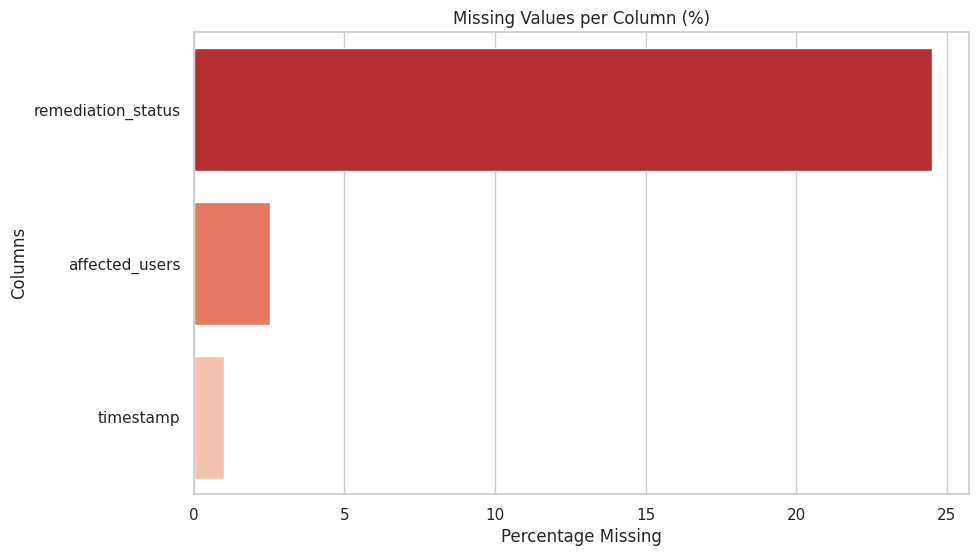

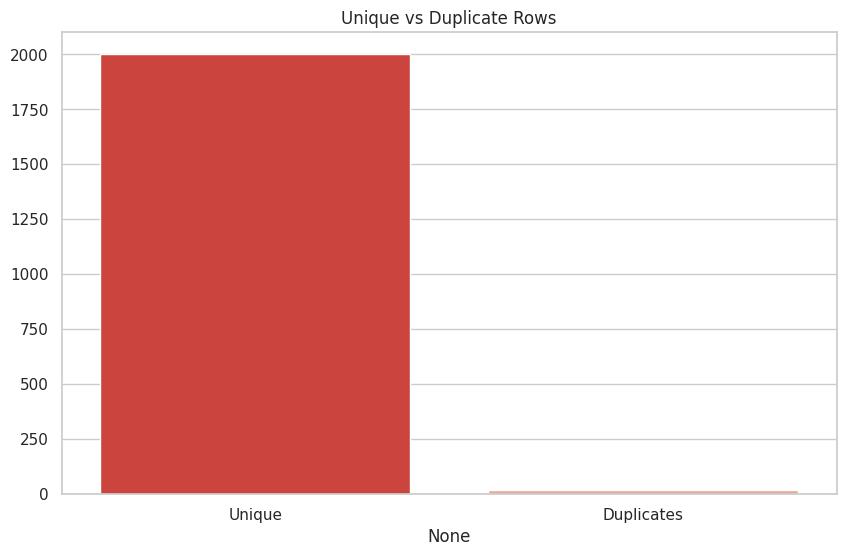

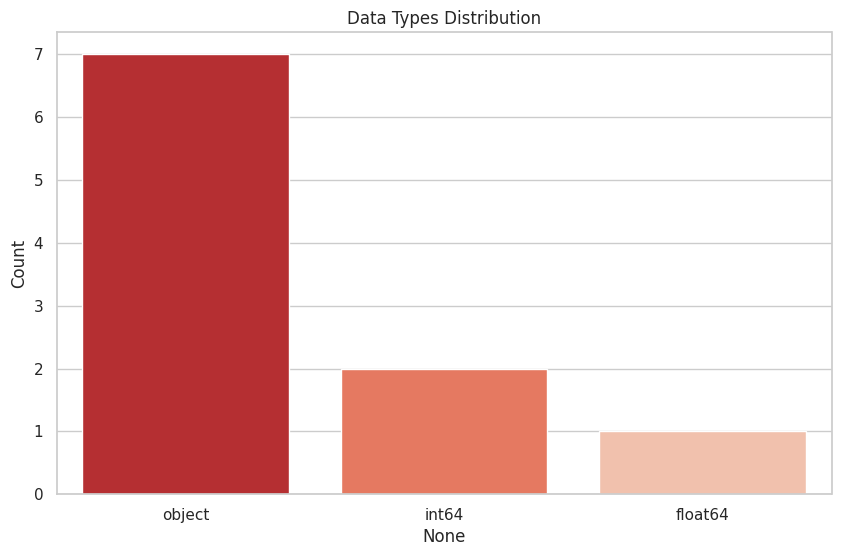


+----------------------------------------------------+
|                                                    |
|        Section 2 – Univariate Analysis             |
|                                                    |
+----------------------------------------------------+

[CHARTING] Generating 3 plots for Numeric Distributions (max 3 per row).



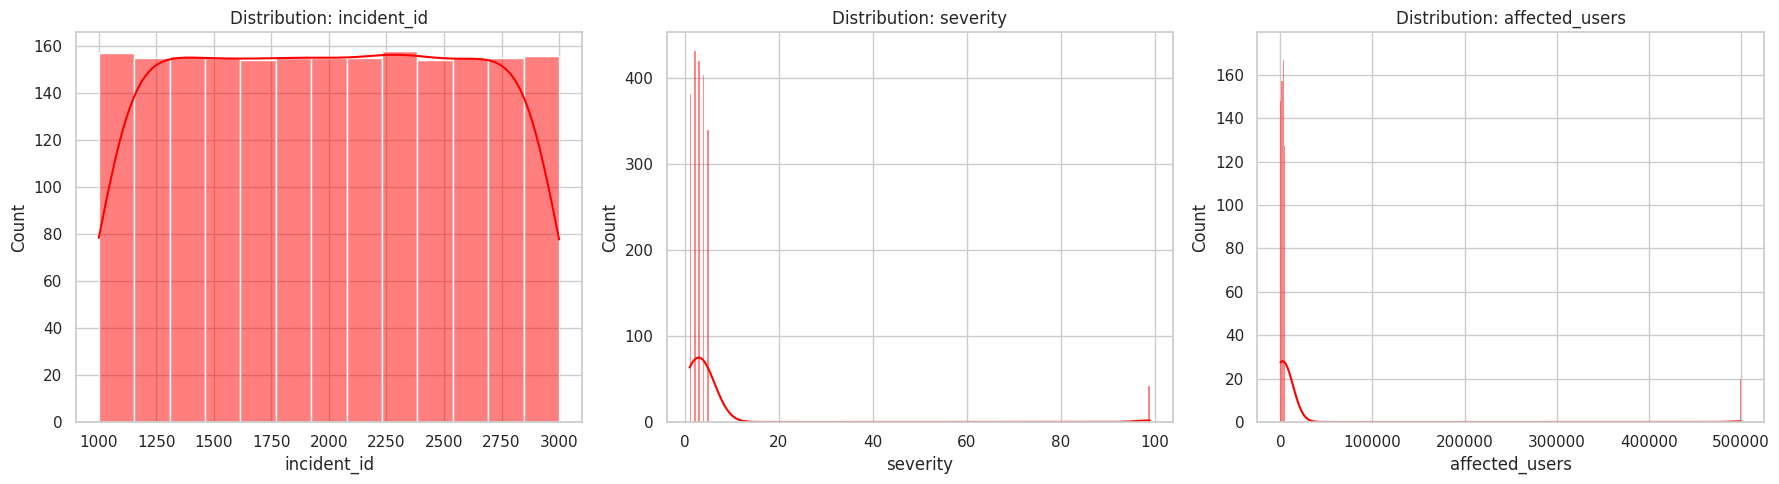


[CHARTING] Generating 3 plots for Numeric Boxplots (max 3 per row).



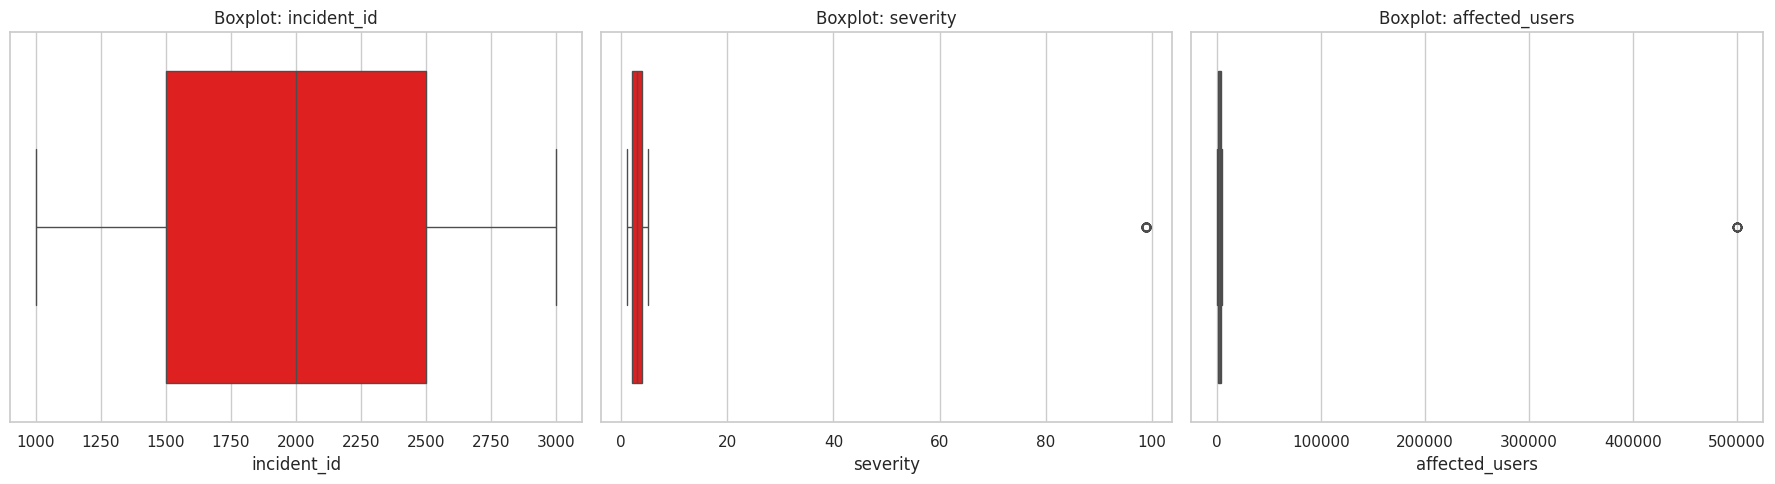


[CHARTING] Generating 7 plots for Categorical Frequencies (max 3 per row).



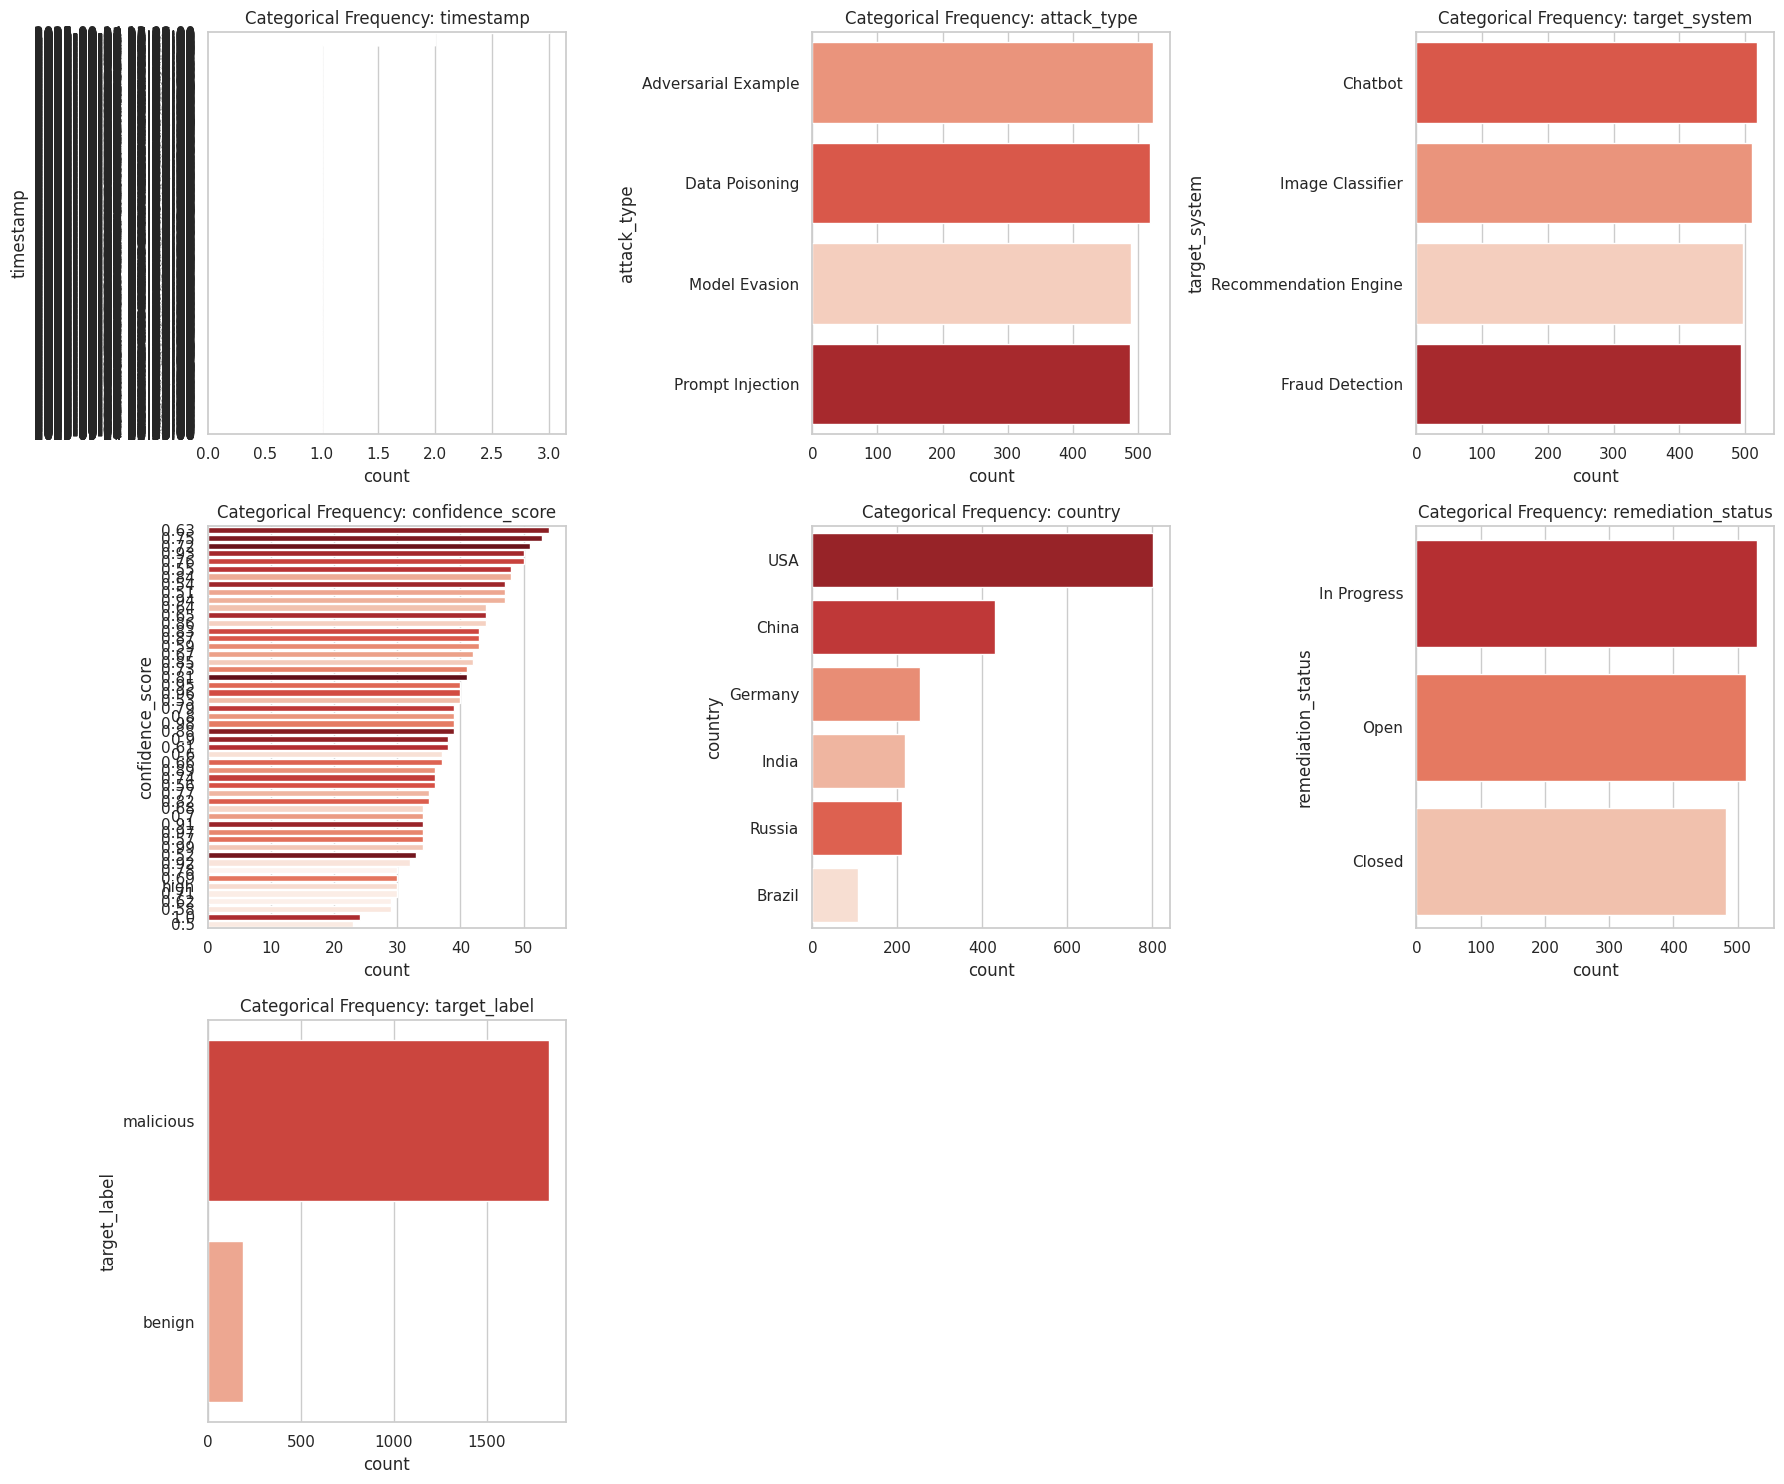


+----------------------------------------------------+
|                                                    |
|    Section 3 – Multivariate Analysis (Optional)    |
|                                                    |
+----------------------------------------------------+

Run multivariate analysis? (y/N) 
(Note: this process takes up to 5 minutes to finish): n

[CHARTING] Multivariate analysis skipped by user.

[CHARTING] Chart generation complete.



In [29]:
# @title
# ----------------- Charting Section (Data Quality, Univariant, Multivariant)

print("\n[CHARTING] Starting chart generation...\n")

# Helper: group plots into rows of up to 3 charts
def plot_in_grid(plot_funcs, titles, section_name):
    """Display plots in rows of 3 with shared formatting."""
    n = len(plot_funcs)
    if n == 0:
        print(f"\n[CHARTING] No charts to generate for {section_name}.\n")
        return

    print(f"\n[CHARTING] Generating {n} plots for {section_name} (max 3 per row).\n")

    rows = (n + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
    axes = axes.flatten()

    for i, func in enumerate(plot_funcs):
        plt.sca(axes[i])
        func()
        axes[i].set_title(titles[i], fontsize=12)

    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# ----------- 1) Data Quality Statistics (Single Full-Width Plots) -----------
print("+----------------------------------------------------+")
print("|                                                    |")
print("|        Section 1 – Data Quality Statistics         |")
print("|                                                    |")
print("+----------------------------------------------------+\n")

# Missing values per column
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
if not missing_pct.empty:
    sns.barplot(
        x=missing_pct.values,
        y=missing_pct.index,
        hue=missing_pct.index,
        palette="Reds_r",
        legend=False
    )
    plt.xlabel("Percentage Missing")
    plt.ylabel("Columns")
    plt.title("Missing Values per Column (%)")
    plt.show()
else:
    print("\n[CHARTING] No missing values detected.\n")

# Duplicate counts
dup_counts = pd.Series({
    "Unique": len(df) - df.duplicated().sum(),
    "Duplicates": df.duplicated().sum()
})
sns.barplot(
    x=dup_counts.index,
    y=dup_counts.values,
    hue=dup_counts.index,
    palette="Reds_r",
    legend=False
)
plt.title("Unique vs Duplicate Rows")
plt.show()

# Data type distribution
dtype_counts = df.dtypes.value_counts()
sns.barplot(
    x=dtype_counts.index.astype(str),
    y=dtype_counts.values,
    hue=dtype_counts.index.astype(str),
    palette="Reds_r",
    legend=False
)
plt.title("Data Types Distribution")
plt.ylabel("Count")
plt.show()

# ----------- 2) Univariate Analysis (Grouped 3 per Row) -----------
print("\n+----------------------------------------------------+")
print("|                                                    |")
print("|        Section 2 – Univariate Analysis             |")
print("|                                                    |")
print("+----------------------------------------------------+")

# Numeric distributions (limit to 10)
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 10:
    print(f"\n[WARNING] Dataset has {len(num_cols)} numeric columns. Showing first 10 only.\n")
    skipped = list(num_cols[10:])
    print("Skipped numeric columns:", skipped)
    choice = input("Render ALL numeric distributions instead? (y/N): ").strip().lower()
    if choice == "y":
        num_cols = df.select_dtypes(include=np.number).columns
    else:
        num_cols = num_cols[:10]

plot_funcs = [lambda col=col: sns.histplot(df[col].dropna(), kde=True, color="red") for col in num_cols]
titles = [f"Distribution: {col}" for col in num_cols]
plot_in_grid(plot_funcs, titles, "Numeric Distributions")

# Numeric boxplots (limit to 10)
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) > 10:
    print(f"\n[WARNING] Dataset has {len(num_cols)} numeric columns. Showing first 10 only.\n")
    skipped = list(num_cols[10:])
    print("Skipped numeric columns:", skipped)
    choice = input("Render ALL numeric boxplots instead? (y/N): ").strip().lower()
    if choice == "y":
        num_cols = df.select_dtypes(include=np.number).columns
    else:
        num_cols = num_cols[:10]

plot_funcs = [lambda col=col: sns.boxplot(x=df[col], color="red") for col in num_cols]
titles = [f"Boxplot: {col}" for col in num_cols]
plot_in_grid(plot_funcs, titles, "Numeric Boxplots")

# Categorical frequencies (limit to 10)
cat_cols = df.select_dtypes(include="object").columns
if len(cat_cols) > 10:
    print(f"\n[WARNING] Dataset has {len(cat_cols)} categorical columns. Showing first 10 only.\n")
    skipped = list(cat_cols[10:])
    print("Skipped categorical columns:", skipped)
    choice = input("Render ALL categorical frequencies instead? (y/N): ").strip().lower()
    if choice == "y":
        cat_cols = df.select_dtypes(include="object").columns
    else:
        cat_cols = cat_cols[:10]

plot_funcs = [
    lambda col=col: sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=df[col],
        palette="Reds_r",
        legend=False
    )
    for col in cat_cols
]
titles = [f"Categorical Frequency: {col}" for col in cat_cols]
plot_in_grid(plot_funcs, titles, "Categorical Frequencies")

# ----------- 3) Multivariate Analysis (Optional, On Request) -----------
print("\n+----------------------------------------------------+")
print("|                                                    |")
print("|    Section 3 – Multivariate Analysis (Optional)    |")
print("|                                                    |")
print("+----------------------------------------------------+\n")

run_multi = input("Run multivariate analysis? (y/N) \n(Note: this process takes up to 5 minutes to finish): ").strip().lower()
print("")

if run_multi == "y":
    numeric_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(include="object").columns

    # Correlation heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10,8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="Reds")
        plt.title("Correlation Heatmap (Numeric Variables)")
        plt.show()
    else:
        print("\n[CHARTING] Not enough numeric columns for correlation heatmap.\n")

    # Pairplot
    if len(numeric_cols) > 1:
        sns.pairplot(df[numeric_cols].dropna(), diag_kind="kde", palette="Reds")
        plt.suptitle("Pairplot of Numeric Variables", y=1.02)
        plt.show()

    # Scatterplots between numeric variables
    if len(numeric_cols) >= 2:
        plot_funcs = [
            (lambda i=i: sns.scatterplot(x=df[numeric_cols[i]], y=df[numeric_cols[i+1]], color="red"))
            for i in range(len(numeric_cols)-1)
        ]
        titles = [f"Scatterplot: {numeric_cols[i]} vs {numeric_cols[i+1]}" for i in range(len(numeric_cols)-1)]
        plot_in_grid(plot_funcs, titles, "Scatterplots (Numeric Pairs)")

    # Boxplots of numeric vs categorical
    plot_funcs = [
        (lambda num=num, cat=cat: sns.boxplot(x=df[cat], y=df[num], palette="Reds"))
        for num in numeric_cols for cat in cat_cols
    ]
    titles = [f"Boxplot: {num} by {cat}" for num in numeric_cols for cat in cat_cols]
    plot_in_grid(plot_funcs, titles, "Numeric vs Categorical Boxplots")

    # Countplot comparisons between categorical variables
    if len(cat_cols) >= 2:
        plot_funcs = [lambda: sns.countplot(x=df[cat_cols[0]], hue=df[cat_cols[1]], palette="Reds_r")]
        titles = [f"Countplot: {cat_cols[0]} vs {cat_cols[1]}"]
        plot_in_grid(plot_funcs, titles, "Categorical vs Categorical Countplot")

else:
    print("[CHARTING] Multivariate analysis skipped by user.")

print("\n[CHARTING] Chart generation complete.\n")

## Generate and download HTML Report

---


In [17]:
# @title
# ----------- Export Fixes: Self-Contained HTML Report (Live Version) -----------

# Destination folder: use DST_PATH defined in Bootstrap cell
dst_folder = DST_PATH
os.makedirs(dst_folder, exist_ok=True)

# Extract original dataset filename from file_path (selected via file_picker)
input_file = file_path if 'file_path' in globals() and file_path else "unknown_dataset.csv"
input_filename = os.path.basename(input_file)

# Create timestamp in UTC (Python 3.12+ safe, timezone-aware)
timestamp = datetime.now(timezone.utc).strftime("%Y-%m-%d_%H-%M-%S_UTC")

# Build output filename: timestamp + input filename + .html
output_filename = f"{timestamp}-{input_filename}.html"

# Full report path
report_path = os.path.join(dst_folder, output_filename)

# Report generation message
print("[REPORT] Report generation in progress...  (this may take a few minutes depending on dataset size)")

# Attempt export with error handling
try:
    # ✅ FIX: Add sample_size parameter (default = 1000, configurable)
    dqa.export_html_report(df, output_path=report_path, sample_size=1000)
    print(f"[REPORT] Report generation successful.")
    print(f"[REPORT] Saved to: {report_path}")

    from IPython.display import HTML, display
    import base64

    with open(report_path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode()

    download_link = f'''
        <a download="{output_filename}"
           href="data:text/html;base64,{b64}"
           target="_blank"
           style="display:inline-block; padding:10px 15px; background:#0073e6; color:white; border-radius:5px; text-decoration:none; font-weight:bold;">
           Download HTML Report
        </a>
    '''
    print("")
    display(HTML(download_link))

except Exception as e:
    print(f"[ERROR] Failed to export HTML report.\nReason: {e}")
    print("\n--- Troubleshooting ---")
    print("1. Check if 'df' is defined and contains a valid DataFrame.")
    print("2. Ensure 'dqa_utils.py' is imported as 'dqa'.")
    print("3. Verify that the destination folder exists and Google Drive is mounted.")
    print(f"   Destination path checked: {dst_folder}")
    print("4. If the error persists, re-run the Colab bootstrap cell to remount Drive and re-import modules.")

[REPORT] Report generation in progress...  (this may take a few minutes depending on dataset size)
[REPORT] Report generation successful.
[REPORT] Saved to: /content/drive/My Drive/DQA/live/dst/2025-09-26_02-17-08_UTC-sample.csv.html

